### 3.16 实战Kaggle比赛：房价预测 ###
https://github.com/ShusenTang/Dive-into-DL-PyTorch/blob/master/docs/chapter03_DL-basics/3.16_kaggle-house-price.md

In [1]:
import numpy as np
import pandas as pd
import sys

In [2]:
train_org = pd.read_csv('~/Datas/KaggleHouse/train.csv',engine='python')
test_org = pd.read_csv('~/Datas/KaggleHouse/test.csv')

In [3]:
test_org['Id'].to_csv(r'~/Datas/KaggleHouse/Id.csv',index = False, header = False)
test_org.shape

(1459, 80)

In [12]:
train = train_org.copy()
test = test_org.copy()
train.shape,test.shape

((1460, 81), (1459, 80))

In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


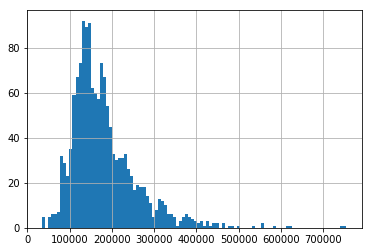

In [18]:
plt = train['SalePrice'].hist(bins = 100)

In [20]:
df = pd.concat([train,test], ignore_index=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [22]:
df = df.drop(['Id'],axis=1)

In [23]:
obj_df = df.select_dtypes(include=['object']).copy()

In [24]:
# obj_df = obj_df.fillna('Na')

In [25]:
dm_obj = pd.get_dummies(obj_df,dummy_na=True)
dm_obj.shape

(2919, 295)

YrSold - 2006

YearBuilt - 1872 

YearRemodAdd -1950 

In [28]:
num_df = df._get_numeric_data()
num_df.shape

(2919, 37)

In [29]:
num_df['YrSold-2016'] = num_df['YrSold'] - 2006
num_df['YearBuilt-1872'] = num_df['YearBuilt'] - 1872
num_df['YearRemodAdd-1950'] = num_df['YearRemodAdd'] - 1950
num_df = num_df.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1)

In [30]:
num_df.isnull().sum()
num_df.shape

(2919, 37)

In [31]:
df_pros = dm_obj.join(num_df)
df_pros.shape

(2919, 332)

In [32]:
df_pros = df_pros.drop(['GarageYrBlt'],axis=1)
df_pros.isnull().sum().sum()

1978

In [66]:
Y = df['SalePrice']
X = df_pros.drop(['SalePrice'],axis=1)
X = X.fillna(X.mean())
df_pros.shape

(2919, 331)

In [67]:
X.isnull().sum().sum()

0

In [75]:
X_train = X[:1460]
Y_train = Y.dropna()
X_test = X[1459:]

In [1]:
Y_train.shape
X_train.shape
X_test.shape

NameError: name 'Y_train' is not defined

In [84]:
X_train.to_csv(r'~/Datas/KaggleHouse/X_train.csv',index = False, header = False)
Y_train.to_csv(r'~/Datas/KaggleHouse/Y_train.csv',index = False, header = False)

In [85]:
X_test.to_csv(r'~/Datas/KaggleHouse/X_test.csv',index = False, header = False)